<a href="https://colab.research.google.com/github/ZacharySBrown/vcu-scma440-2021q1/blob/master/labs/Regression_Arima_Errors_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Fetch Data
Press the play button in Google Colab or press Shift+Enter execute the cell below to download and load the data and packages for this assignment

This will setup you environment and load a DataFrame called `bankdata` that contains the bank data from Makridakis Chapter 6.

In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from statsmodels.tsa.arima.model import ARIMA
plt.style.use('dark_background')


from scipy.stats import t, f

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16

!curl https://vcu-scma-440.s3.amazonaws.com/data/bankdata.csv > bankdata.csv

bankdata = pd.read_csv('bankdata.csv', parse_dates=['date']).set_index('date').rename(columns={'34': 'mo_34'})

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1687  100  16 0    0     0      0      0 --:--:-- --:--:-- --:--:--     087    0     0  12050      0 --:--:-- --:--:-- --:--:-- 11964


# Inspecting the data

Before we get started with any analysis, let's begin by taking a look at the data and plotting the four columns. In the cell below, take a look at the data and plot the time series. It may be useful to plot the `balance` column by itself, and the `aaa` and `mo_34` columns together. 

Remember, to plot a single column, you type:

```
display(plot['my_column'].plot())
```

and to plot two columns, you type:

```
display(plot[['one_column','another_column']].plot())
```

(note the _two_ sets of `[]` when you're specifying two columns)

,balance,aaa,mo_34
date,,,
2000-01-01,360071,5.94,5.31
2000-02-01,361217,6.00,5.60
2000-03-01,358774,6.08,5.49
2000-04-01,360271,6.17,5.80
2000-05-01,360139,6.14,5.61


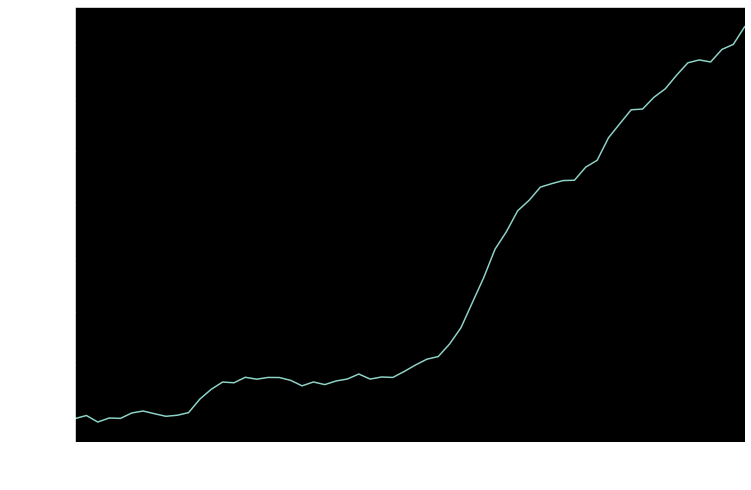

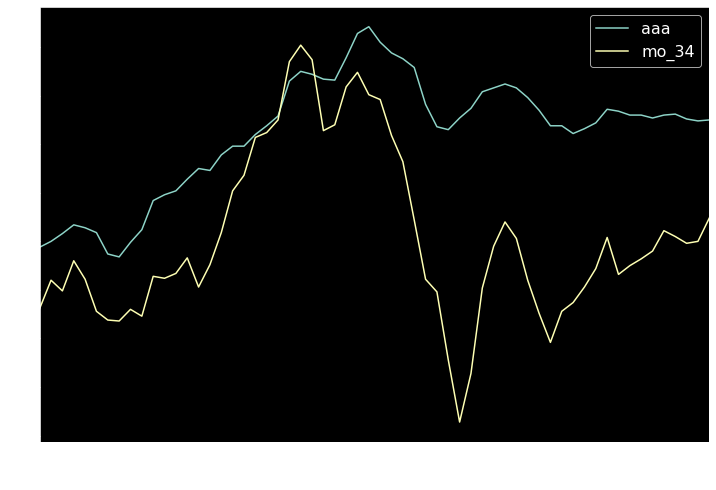

In [24]:
display(bankdata.head())
display(bankdata['balance'].plot())
display(bankdata[['aaa','mo_34']].plot())

These series appear to be non-stationary in the mean, so we'll begin by removing that non-stationarity using differencing. Create three new columns

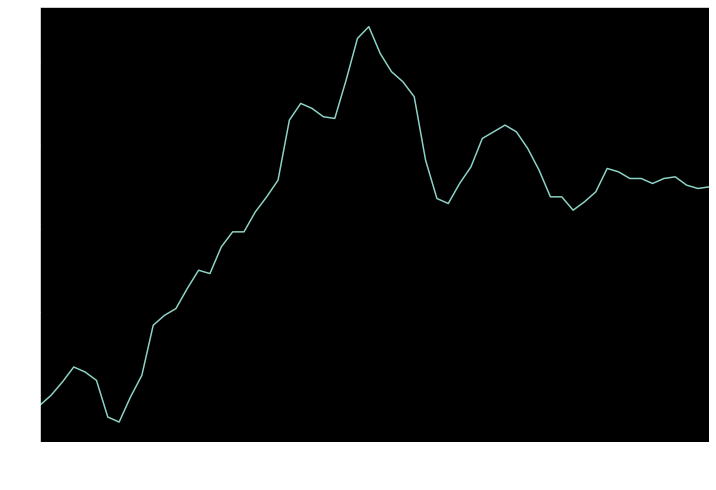

In [25]:
bankdata['aaa'].plot()

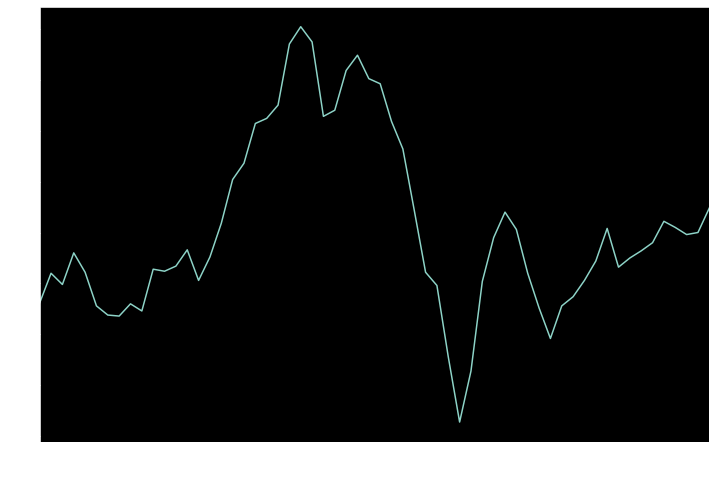

In [26]:
bankdata['mo_34'].plot()

# Creating Difference Variables

These series appear to be non-stationary in the mean, so we'll begin by removing that non-stationarity using differencing. We can do this using the `.diff()` function: 

```
data['my_diff_column'] = data['my_original_column'].diff()
```

Below we'll carry this out for the `balance`, `aaa`, and `mo_34` columns, naming the new columns containing the differences as `d_balance`, `d_aaa`, and `d_mo_34`. 

**Note here that this introduces a single row with `NaN` in it from taking the first difference, which we'll drop using `data = data.dropna()`**


In [27]:
bankdata['d_balance'] = bankdata['balance'].diff()
bankdata['d_aaa'] = bankdata['aaa'].diff()
bankdata['d_mo_34'] = bankdata['mo_34'].diff()
bankdata = bankdata.dropna()
bankdata.head()

,balance,aaa,mo_34,d_balance,d_aaa,d_mo_34
date,,,,,,
2000-02-01,361217,6.00,5.60,1146.0,0.06,0.29
2000-03-01,358774,6.08,5.49,-2443.0,0.08,-0.11
2000-04-01,360271,6.17,5.80,1497.0,0.09,0.31
2000-05-01,360139,6.14,5.61,-132.0,-0.03,-0.19
2000-06-01,362164,6.09,5.28,2025.0,-0.05,-0.33


We'll next want to check that this data appears stationary. Plot `d_balance` by itself, and `d_aaa` and `d_mo_34` to make sure they are now stationary in the mean. 

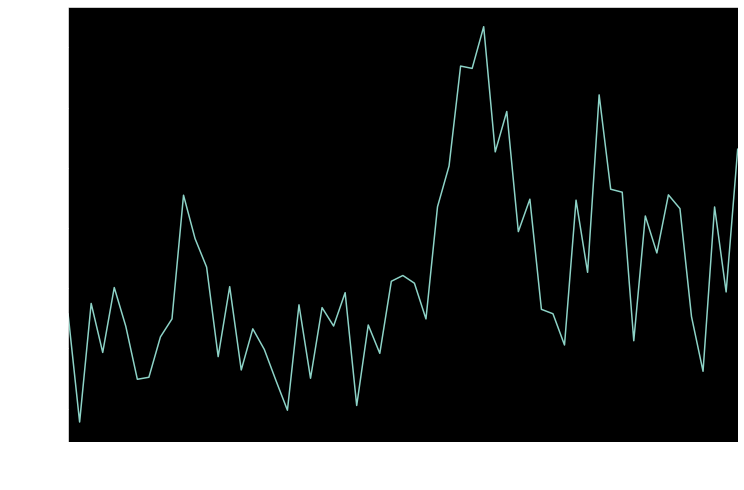

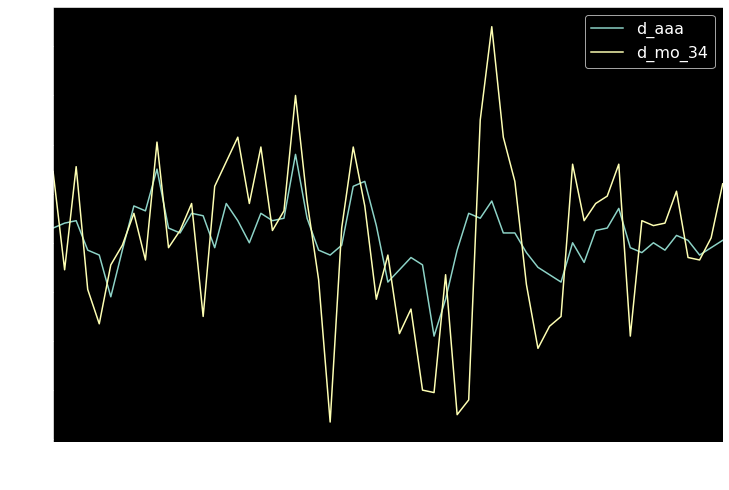

In [28]:
# YOUR CODE HERE

display(bankdata['d_balance'].plot())
display(bankdata[['d_aaa','d_mo_34']].plot())

# Regression with ARIMA errors

We'll not attempt to fit a regression model to this data with ARIMA errors. We'll start with a simple `AR(1)` (`ARIMA(1,0,0)`) model for our regression errors. In the cell below, create an ARIMA model using `d_balance` as endog, and `d_aaa` and `d_mo_34` as exog, and set the appropriate value for `order`. Then fit the model (`model.fit()`) and print out the summary of the results. 

In [34]:
# YOUR CODE HERE

model = ARIMA(
    endog=bankdata['d_balance'], 
    exog=bankdata[['d_aaa','d_mo_34']],
    order=(1,0,0)
)

results = model.fit()

print(results.summary())

# `d_mo_34 found to not be significant
# rerun fit removing that variable
model = ARIMA(
    endog=bankdata['d_balance'], 
    exog=bankdata[['d_aaa']],
    order=(1,0,0)
)

results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              d_balance   No. Observations:                   59
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -541.591
Date:                Sun, 18 Apr 2021   AIC                           1093.182
Time:                        16:11:46   BIC                           1103.569
Sample:                    02-01-2000   HQIC                          1097.237
                         - 12-01-2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2644.4028    834.947      3.167      0.002    1007.937    4280.869
d_aaa      -7245.3952   3864.762     -1.875      0.061   -1.48e+04     329.400
d_mo_34       91.0816   1079.997      0.084      0.9

/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/

If any of the variables in the fit above do not have significant weights (p-value > 0.05), drop those from the fit and rerun the fit.

# Determining Appropriate ARIMA model for errors

Now that we've carried out a regression, we want to check the residuals for any autoregressive patterns and update our choice of ARIMA model for the errors if necessary. Judigin from the value for Ljung-Box Q above, it appears that our residuals don't have any autocorrelation, but we can plot them, as well as their ACF and PACF to double check. In the cell below, plot the residuals with `display(plt.plot(results.resid))`, and then plot the ACF and PACF plots for `results.resid` (remember to set `zero=False`).

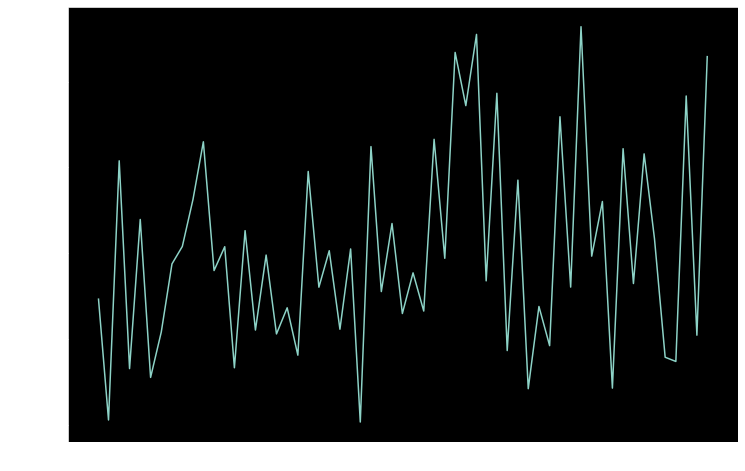

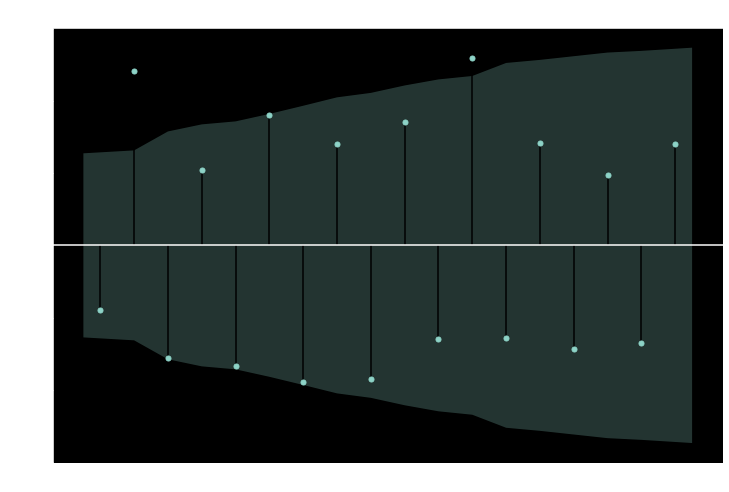

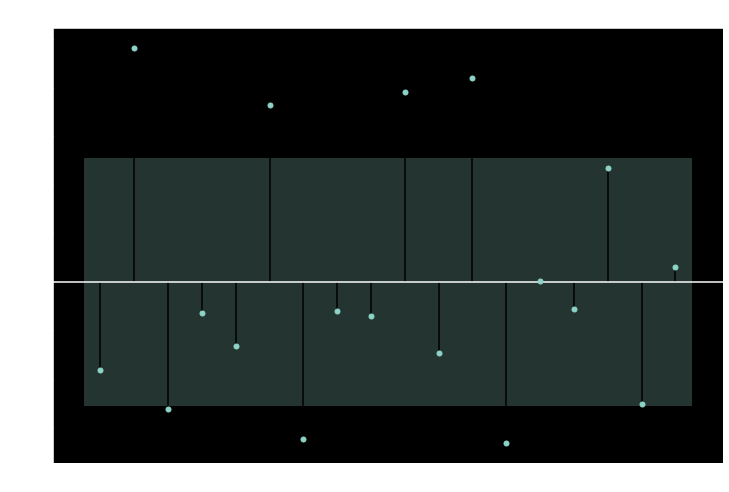

In [35]:
display(plt.plot(results.resid))
my_acf = plot_acf(results.resid, zero=False)
my_pacf = plot_pacf(results.resid, zero=False)

# Updating Preliminary ARIMA Model

From the above, we see strong autocorrelations remain up through lag 3 in the PACF. It also appears that we a seasonal autoregressive pattern at lag 12 (with a repetition at 24). We'll update our ARIMA model for the errors to an:
$$ARIMA(3,0,0)(2,0,0)_{12}$$

In the cell below, create a new model, updating the value passed to `order` above, and additionally specifying the `seasonal_order` argument to be `(1,0,0,12)`

In [42]:
model = ARIMA(
    endog=bankdata['d_balance'], 
    exog=bankdata[['d_aaa']],
    order=(3,0,0), 
    seasonal_order=(2,0,0,12)
)

results = model.fit()

print(results.summary())

/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                    SARIMAX Results                                     
Dep. Variable:                        d_balance   No. Observations:                   59
Model:             ARIMA(3, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -518.756
Date:                          Sun, 18 Apr 2021   AIC                           1053.511
Time:                                  16:16:30   BIC                           1070.131
Sample:                              02-01-2000   HQIC                          1059.999
                                   - 12-01-2004                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2641.6384   2439.065      1.083      0.279   -2138.842    7422.118
d_aaa      -7072.7508   1871.258     -3.780      0.

Note the much larger p-value now for the Ljung-Box Q, indicating that there is very little autocorrelation remaining in the residuals. 

In the cell below, verify that the observed autocorrelation in the resoduals has been reduced, by plotting the ACF and PACF

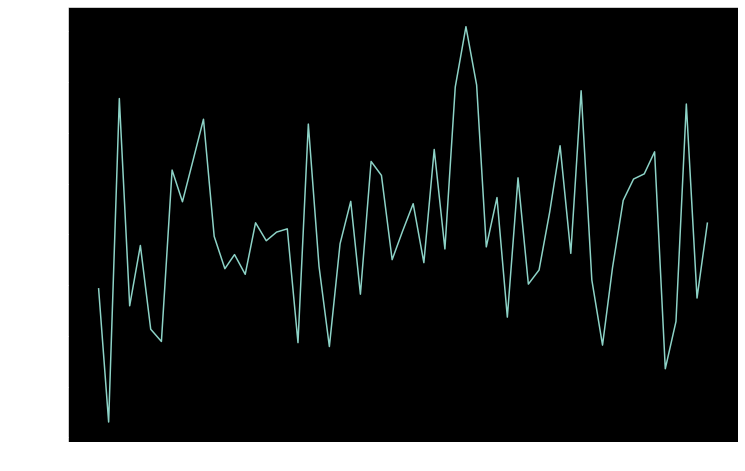

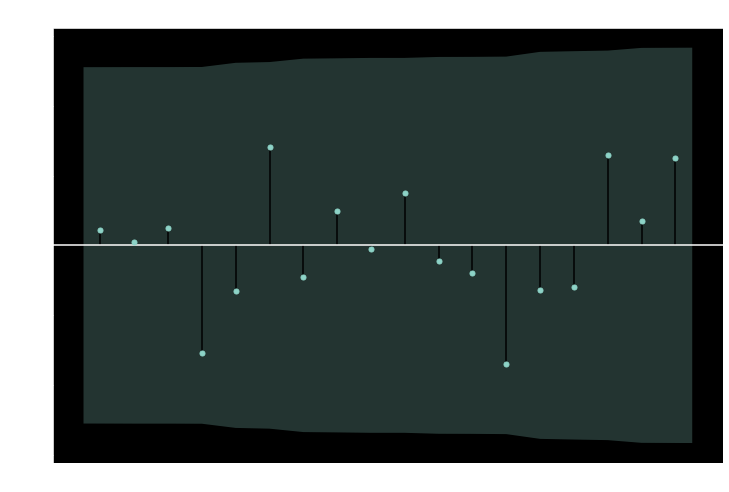

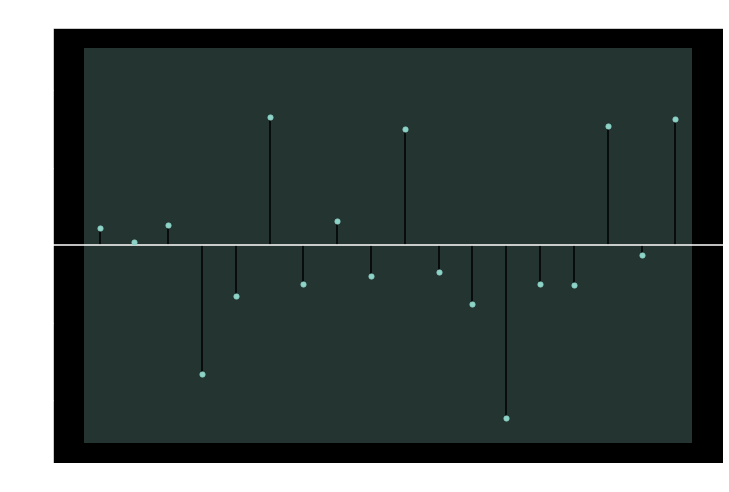

In [43]:
display(plt.plot(results.resid))
my_acf = plot_acf(results.resid, zero=False)
my_pacf = plot_pacf(results.resid, zero=False)